# Exploratory Data Analysis - Merged IMDB Data

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# IMDB File path
file_path = '/Users/timjamboula/code/m-r-c-l/Movie-Recommendation-Engine/raw_data/ml-latest-small/imdb_movie_final.csv'
data_semifinal_df = pd.read_csv(file_path)
data_semifinal_df

,userId,movieId,user_rating,user_rating_time,title,release_year,user_tag,imdbId,total_user_ratings,average_rating,...,budget,imdb_id,description,popularity,imbd_tagline,cast_actors,director,imdb_rating,imdb_votes,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story,1995,NaN,114709,215,3.9,...,30000000.0,tt0114709,"Led by Woody, Andy's toys live happily in his ...",135.530,Hang on for the comedy that goes to infinity a...,"Penn Jillette, Jim Varney",John Lasseter,8.3,1084026.0,"Adventure, Animation, Children, Comedy, Family..."
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men,1995,NaN,113228,53,3.2,...,25000000.0,tt0113228,A family wedding reignites the ancient feud be...,11.833,Still Yelling. Still Fighting. Still Ready for...,"Sophia Loren, Jack Lemmon",Howard Deutch,6.7,30004.0,"Comedy, Romance"
2,1,6,4.0,2000-07-30 18:37:04,Heat,1995,NaN,113277,102,3.9,...,60000000.0,tt0113277,Obsessive master thief Neil McCauley leads a t...,48.869,A Los Angeles crime saga.,"Henry Rollins, Rick Marzan",Michael Mann,8.3,729795.0,"Action, Crime, Drama, Thriller"
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en),1995,NaN,114369,204,4.0,...,33000000.0,tt0114369,Two homicide detectives are on a desperate hun...,108.020,Seven deadly sins. Seven ways to die.,"Shannon Wilcox, Hawthorne James",David Fincher,8.6,1829387.0,"Crime, Mystery, Thriller"
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The",1995,NaN,114814,208,4.3,...,6000000.0,tt0114814,"Held in an L.A. interrogation room, Verbal Kin...",41.143,Five criminals. One line up. No coincidence.,"Dan Hedaya, Gabriel Byrne",Bryan Singer,8.5,1157914.0,"Crime, Drama, Mystery, Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102683,610,166534,4.0,2017-05-03 21:53:22,Split,2017,NaN,4972582,6,3.3,...,9000000.0,tt4972582,Though Kevin has evidenced 23 personalities to...,70.505,Kevin has 23 distinct personalities. The 24th ...,"John Jillard Sr., Jerome Gallman",M. Night Shyamalan,7.3,566678.0,"Drama, Horror, Thriller"
102684,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two,2017,Heroic Bloodshed,4425200,13,4.3,...,40000000.0,tt4425200,John Wick is forced out of retirement by a for...,101.664,Never stab the devil in the back!,"Thaddeus Daniels, Tim Connolly",Chad Stahelski,7.4,521063.0,"Action, Crime, Thriller"
102685,610,168250,5.0,2017-05-08 19:50:47,Get Out,2017,NaN,5052448,15,3.6,...,4500000.0,tt5052448,Chris and his girlfriend Rose go upstate to vi...,66.339,"Just because you're invited, doesn't mean you'...","Bradley Whitford, Lil Rel Howery",Jordan Peele,7.8,720999.0,"Horror, Mystery, Thriller"
102686,610,168252,5.0,2017-05-03 21:19:12,Logan,2017,NaN,3315342,29,4.2,...,97000000.0,tt3315342,"In the near future, a weary Logan cares for an...",159.281,His time has come.,"Bryant Tardy, Daniel Hernández",James Mangold,8.1,856843.0,"Action, Drama, Sci-Fi, Science Fiction"


In [162]:
data_semifinal_df.nunique()

userId                  610
movieId                9724
user_rating              10
user_rating_time      85043
title                  9446
release_year            106
user_tag               1543
imdbId                 9724
total_user_ratings      180
average_rating           43
num_genres                9
tmdb_vote_average      2174
tmdb_vote_count        3283
revenue                5755
runtime                 223
budget                  727
imdb_id                9632
description            9613
popularity             8561
imbd_tagline           8208
cast_actors            9550
director               4139
imdb_rating              75
imdb_votes             9078
genres                 1625
dtype: int64

In [163]:
data_semifinal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102688 entries, 0 to 102687
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              102688 non-null  int64  
 1   movieId             102688 non-null  int64  
 2   user_rating         102688 non-null  float64
 3   user_rating_time    102688 non-null  object 
 4   title               102688 non-null  object 
 5   release_year        102688 non-null  int64  
 6   user_tag            3476 non-null    object 
 7   imdbId              102688 non-null  int64  
 8   total_user_ratings  102688 non-null  int64  
 9   average_rating      102688 non-null  float64
 10  num_genres          102688 non-null  int64  
 11  tmdb_vote_average   102439 non-null  float64
 12  tmdb_vote_count     102439 non-null  float64
 13  revenue             102439 non-null  float64
 14  runtime             102439 non-null  float64
 15  budget              102439 non-nul

In [164]:
data_semifinal_df.isnull().sum()

userId                    0
movieId                   0
user_rating               0
user_rating_time          0
title                     0
release_year              0
user_tag              99212
imdbId                    0
total_user_ratings        0
average_rating            0
num_genres                0
tmdb_vote_average       249
tmdb_vote_count         249
revenue                 249
runtime                 249
budget                  249
imdb_id                 249
description             259
popularity              249
imbd_tagline           3774
cast_actors             354
director                270
imdb_rating             250
imdb_votes              250
genres                    0
dtype: int64

In [165]:
data_semifinal_df.describe()

,userId,movieId,user_rating,release_year,imdbId,total_user_ratings,average_rating,num_genres,tmdb_vote_average,tmdb_vote_count,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,102688.000000,102688.000000,102688.000000,102688.000000,1.026880e+05,102688.000000,102688.000000,102688.000000,102439.000000,102439.000000,1.024390e+05,102439.000000,1.024390e+05,102439.000000,102438.000000,1.024380e+05
mean,327.762221,19743.452107,3.514802,1994.509251,3.564716e+05,61.197121,3.514857,2.726833,7.035991,5724.752536,1.894973e+08,114.706762,4.005534e+07,45.458929,7.190572,3.832502e+05
std,183.214298,35882.550077,1.043136,14.392503,6.295437e+05,68.341102,0.570931,1.193731,0.822242,6624.787376,2.643666e+08,24.182214,4.764520e+07,44.882067,0.941310,4.903279e+05
min,1.000000,1.000000,0.500000,1902.000000,4.170000e+02,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.033000,1.300000,1.200000e+01
25%,177.000000,1199.000000,3.000000,1990.000000,9.970300e+04,14.000000,3.200000,2.000000,6.500000,1029.000000,2.392005e+07,98.000000,6.500000e+06,20.545000,6.600000,6.709900e+04
50%,328.000000,3005.000000,3.500000,1997.000000,1.188420e+05,39.000000,3.600000,3.000000,7.100000,3148.000000,9.282355e+07,111.000000,2.380000e+07,33.027000,7.300000,2.011380e+05
75%,477.000000,8366.500000,4.000000,2003.000000,3.172480e+05,85.000000,3.900000,3.000000,7.600000,8067.000000,2.541000e+08,127.000000,5.700000e+07,51.547000,7.900000,4.778660e+05
max,610.000000,193609.000000,5.000000,2018.000000,8.391976e+06,484.000000,5.000000,10.000000,10.000000,36217.000000,2.923706e+09,551.000000,3.790000e+08,627.282000,9.300000,2.934407e+06


In [166]:
#Drop empty IMDB_rating rows
data_semifinal_df_cleaned = data_semifinal_df.dropna(subset=['imdb_rating'])
data_semifinal_df_cleaned

,userId,movieId,user_rating,user_rating_time,title,release_year,user_tag,imdbId,total_user_ratings,average_rating,...,budget,imdb_id,description,popularity,imbd_tagline,cast_actors,director,imdb_rating,imdb_votes,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story,1995,NaN,114709,215,3.9,...,30000000.0,tt0114709,"Led by Woody, Andy's toys live happily in his ...",135.530,Hang on for the comedy that goes to infinity a...,"Penn Jillette, Jim Varney",John Lasseter,8.3,1084026.0,"Adventure, Animation, Children, Comedy, Family..."
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men,1995,NaN,113228,53,3.2,...,25000000.0,tt0113228,A family wedding reignites the ancient feud be...,11.833,Still Yelling. Still Fighting. Still Ready for...,"Sophia Loren, Jack Lemmon",Howard Deutch,6.7,30004.0,"Comedy, Romance"
2,1,6,4.0,2000-07-30 18:37:04,Heat,1995,NaN,113277,102,3.9,...,60000000.0,tt0113277,Obsessive master thief Neil McCauley leads a t...,48.869,A Los Angeles crime saga.,"Henry Rollins, Rick Marzan",Michael Mann,8.3,729795.0,"Action, Crime, Drama, Thriller"
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en),1995,NaN,114369,204,4.0,...,33000000.0,tt0114369,Two homicide detectives are on a desperate hun...,108.020,Seven deadly sins. Seven ways to die.,"Shannon Wilcox, Hawthorne James",David Fincher,8.6,1829387.0,"Crime, Mystery, Thriller"
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The",1995,NaN,114814,208,4.3,...,6000000.0,tt0114814,"Held in an L.A. interrogation room, Verbal Kin...",41.143,Five criminals. One line up. No coincidence.,"Dan Hedaya, Gabriel Byrne",Bryan Singer,8.5,1157914.0,"Crime, Drama, Mystery, Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102683,610,166534,4.0,2017-05-03 21:53:22,Split,2017,NaN,4972582,6,3.3,...,9000000.0,tt4972582,Though Kevin has evidenced 23 personalities to...,70.505,Kevin has 23 distinct personalities. The 24th ...,"John Jillard Sr., Jerome Gallman",M. Night Shyamalan,7.3,566678.0,"Drama, Horror, Thriller"
102684,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two,2017,Heroic Bloodshed,4425200,13,4.3,...,40000000.0,tt4425200,John Wick is forced out of retirement by a for...,101.664,Never stab the devil in the back!,"Thaddeus Daniels, Tim Connolly",Chad Stahelski,7.4,521063.0,"Action, Crime, Thriller"
102685,610,168250,5.0,2017-05-08 19:50:47,Get Out,2017,NaN,5052448,15,3.6,...,4500000.0,tt5052448,Chris and his girlfriend Rose go upstate to vi...,66.339,"Just because you're invited, doesn't mean you'...","Bradley Whitford, Lil Rel Howery",Jordan Peele,7.8,720999.0,"Horror, Mystery, Thriller"
102686,610,168252,5.0,2017-05-03 21:19:12,Logan,2017,NaN,3315342,29,4.2,...,97000000.0,tt3315342,"In the near future, a weary Logan cares for an...",159.281,His time has come.,"Bryant Tardy, Daniel Hernández",James Mangold,8.1,856843.0,"Action, Drama, Sci-Fi, Science Fiction"


In [167]:
data_semifinal_df_cleaned.nunique()

userId                  610
movieId                9631
user_rating              10
user_rating_time      84819
title                  9368
release_year            106
user_tag               1537
imdbId                 9631
total_user_ratings      180
average_rating           43
num_genres                9
tmdb_vote_average      2174
tmdb_vote_count        3283
revenue                5755
runtime                 223
budget                  727
imdb_id                9631
description            9612
popularity             8561
imbd_tagline           8208
cast_actors            9549
director               4139
imdb_rating              75
imdb_votes             9078
genres                 1612
dtype: int64

In [168]:
# Filling missing values in 'tag' column with 'Unknown'
data_semifinal_df_cleaned['user_tag'] = data_semifinal_df_cleaned['user_tag'].fillna('Unknown')
data_semifinal_df_cleaned['imbd_tagline'] = data_semifinal_df_cleaned['imbd_tagline'].fillna('Unknown')
data_semifinal_df_cleaned['cast_actors'] = data_semifinal_df_cleaned['cast_actors'].fillna('Unknown')
data_semifinal_df_cleaned['director'] = data_semifinal_df_cleaned['director'].fillna('Unknown')
data_semifinal_df_cleaned['description'] = data_semifinal_df_cleaned['description'].fillna('Unknown')

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/3198656724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['user_tag'] = data_semifinal_df_cleaned['user_tag'].fillna('Unknown')
/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/3198656724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['imbd_tagline'] = data_semifinal_df_cleaned['imbd_tagline'].fillna('Unknown')
/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykern

In [169]:
# Following columns to integers
data_semifinal_df_cleaned['budget'] = data_semifinal_df_cleaned['budget'].fillna(0).astype(int)
data_semifinal_df_cleaned['popularity'] = data_semifinal_df_cleaned['popularity'].fillna(0).astype(int)
data_semifinal_df_cleaned['imdb_votes'] = data_semifinal_df_cleaned['imdb_votes'].fillna(0).astype(int)
data_semifinal_df_cleaned['tmdb_vote_count'] = data_semifinal_df_cleaned['tmdb_vote_count'].fillna(0).astype(int)
data_semifinal_df_cleaned['revenue'] = data_semifinal_df_cleaned['revenue'].fillna(0).astype(int)
data_semifinal_df_cleaned['runtime'] = data_semifinal_df_cleaned['runtime'].fillna(0).astype(int)
data_semifinal_df_cleaned['budget'] = data_semifinal_df_cleaned['budget'].fillna(0).astype(int)
data_semifinal_df_cleaned['tmdb_vote_average'] = data_semifinal_df_cleaned['tmdb_vote_average'].round(1)

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/3631505340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['budget'] = data_semifinal_df_cleaned['budget'].fillna(0).astype(int)
/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/3631505340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['popularity'] = data_semifinal_df_cleaned['popularity'].fillna(0).astype(int)
/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykern

In [173]:
# Columns release_year to datetime
data_semifinal_df_cleaned['release_year'] = pd.to_datetime(data_semifinal_df_cleaned['release_year'], format='%Y', errors='coerce')
data_semifinal_df_cleaned['user_rating_time'] = pd.to_datetime(data_semifinal_df_cleaned['user_rating_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/2958481072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['release_year'] = pd.to_datetime(data_semifinal_df_cleaned['release_year'], format='%Y', errors='coerce')
/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/2958481072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['user_rating_time'] = pd.to_datetime(data_semifinal_df_cleaned['user_rating_time'], format='%Y-%m-

In [179]:
# From 1-10 to 1-5 rating system
data_semifinal_df_cleaned['tmdb_vote_average_1_5'] = data_semifinal_df_cleaned['tmdb_vote_average'] / 2
data_semifinal_df_cleaned['tmdb_vote_average_1_5'] = data_semifinal_df_cleaned['tmdb_vote_average_1_5'].round(1)
data_semifinal_df_cleaned['imdb_rating_1_5'] = data_semifinal_df_cleaned['imdb_rating'] / 2
data_semifinal_df_cleaned['imdb_rating_1_5'] = data_semifinal_df_cleaned['imdb_rating_1_5'].round(1)

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/2841098094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['tmdb_vote_average_1_5'] = data_semifinal_df_cleaned['tmdb_vote_average'] / 2
/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/2841098094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_semifinal_df_cleaned['tmdb_vote_average_1_5'] = data_semifinal_df_cleaned['tmdb_vote_average_1_5'].round(1)
/var/folders/h2/7np79zrx3xj5tj51tm9hq1z

In [180]:
data_semifinal_df_cleaned

,userId,movieId,user_rating,user_rating_time,title,release_year,user_tag,imdbId,total_user_ratings,average_rating,...,description,popularity,imbd_tagline,cast_actors,director,imdb_rating,imdb_votes,genres,tmdb_vote_average_1_5,imdb_rating_1_5
0,1,1,4.0,2000-07-30 18:45:03,Toy Story,1995-01-01,Unknown,114709,215,3.9,...,"Led by Woody, Andy's toys live happily in his ...",135,Hang on for the comedy that goes to infinity a...,"Penn Jillette, Jim Varney",John Lasseter,8.3,1084026,"Adventure, Animation, Children, Comedy, Family...",4.0,4.2
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men,1995-01-01,Unknown,113228,53,3.2,...,A family wedding reignites the ancient feud be...,11,Still Yelling. Still Fighting. Still Ready for...,"Sophia Loren, Jack Lemmon",Howard Deutch,6.7,30004,"Comedy, Romance",3.2,3.4
2,1,6,4.0,2000-07-30 18:37:04,Heat,1995-01-01,Unknown,113277,102,3.9,...,Obsessive master thief Neil McCauley leads a t...,48,A Los Angeles crime saga.,"Henry Rollins, Rick Marzan",Michael Mann,8.3,729795,"Action, Crime, Drama, Thriller",4.0,4.2
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en),1995-01-01,Unknown,114369,204,4.0,...,Two homicide detectives are on a desperate hun...,108,Seven deadly sins. Seven ways to die.,"Shannon Wilcox, Hawthorne James",David Fincher,8.6,1829387,"Crime, Mystery, Thriller",4.2,4.3
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The",1995-01-01,Unknown,114814,208,4.3,...,"Held in an L.A. interrogation room, Verbal Kin...",41,Five criminals. One line up. No coincidence.,"Dan Hedaya, Gabriel Byrne",Bryan Singer,8.5,1157914,"Crime, Drama, Mystery, Thriller",4.1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102683,610,166534,4.0,2017-05-03 21:53:22,Split,2017-01-01,Unknown,4972582,6,3.3,...,Though Kevin has evidenced 23 personalities to...,70,Kevin has 23 distinct personalities. The 24th ...,"John Jillard Sr., Jerome Gallman",M. Night Shyamalan,7.3,566678,"Drama, Horror, Thriller",3.6,3.6
102684,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two,2017-01-01,Heroic Bloodshed,4425200,13,4.3,...,John Wick is forced out of retirement by a for...,101,Never stab the devil in the back!,"Thaddeus Daniels, Tim Connolly",Chad Stahelski,7.4,521063,"Action, Crime, Thriller",3.6,3.7
102685,610,168250,5.0,2017-05-08 19:50:47,Get Out,2017-01-01,Unknown,5052448,15,3.6,...,Chris and his girlfriend Rose go upstate to vi...,66,"Just because you're invited, doesn't mean you'...","Bradley Whitford, Lil Rel Howery",Jordan Peele,7.8,720999,"Horror, Mystery, Thriller",3.8,3.9
102686,610,168252,5.0,2017-05-03 21:19:12,Logan,2017-01-01,Unknown,3315342,29,4.2,...,"In the near future, a weary Logan cares for an...",159,His time has come.,"Bryant Tardy, Daniel Hernández",James Mangold,8.1,856843,"Action, Drama, Sci-Fi, Science Fiction",3.9,4.0


In [226]:
data_semifinal_df_cleaned.nunique()

userId                     610
movieId                   9631
user_rating                 10
user_rating_time         84819
title                     9368
release_year               106
user_tag                  1538
imdbId                    9631
total_user_ratings         180
average_rating              43
num_genres                   9
tmdb_vote_average           69
tmdb_vote_count           3283
revenue                   5755
runtime                    223
budget                     727
imdb_id                   9631
description               9613
popularity                 175
imbd_tagline              8209
cast_actors               9550
director                  4140
imdb_rating                 75
imdb_votes                9078
genres                    1612
tmdb_vote_average_1_5       38
imdb_rating_1_5             40
dtype: int64

In [228]:
# To CSV
#data_semifinal_df_cleaned.to_csv('/Users/timjamboula/code/m-r-c-l/Movie-Recommendation-Engine/raw_data/ml-latest-small/movie_imdb_final_v003.csv', index=False)

## Group by Genres - Analysis

In [160]:
# Splitting the 'genres' column into individual genres inserting into new dataframe with each genre 
# represented separately.
# New df with multiple rows, per genre
genres_exploded_df = data_semifinal_df_cleaned.copy()
genres_exploded_df = genres_exploded_df.dropna(subset=['genres'])
genres_exploded_df = genres_exploded_df.assign(genre=genres_exploded_df['genres'].str.split(',')).explode('genre').reset_index(drop=True)

# Calculating the average rating per genre
avg_rating_per_genre = genres_exploded_df.groupby('genre')['user_rating'].mean().reset_index()
avg_rating_per_genre.rename(columns={'user_rating': 'avg_user_rating'}, inplace=True)
genre_analysis_df['avg_user_rating'] = genre_analysis_df['avg_user_rating'].round(1)

#Counting the number of movies per genre
movie_count_per_genre = genres_exploded_df.groupby('genre')['movieId'].nunique().reset_index()
movie_count_per_genre.rename(columns={'movieId': 'movie_count'}, inplace=True)

# Counting the number of users per genre
user_count_per_genre = genres_exploded_df.groupby('genre')['userId'].nunique().reset_index()
user_count_per_genre.rename(columns={'userId': 'user_count'}, inplace=True)

# Merging into one DataFrame
genre_analysis_df = pd.merge(avg_rating_per_genre, movie_count_per_genre, on='genre')
genre_analysis_df = pd.merge(genre_analysis_df, user_count_per_genre, on='genre')

# Calculating the percentage of movies per genre
total_movies = genres_exploded_df['movieId'].nunique()
genre_analysis_df['movie_percentage'] = (genre_analysis_df['movie_count'] / total_movies) * 100
genre_analysis_df['movie_percentage'] = genre_analysis_df['movie_percentage'].round(1)
genre_analysis_df['avg_user_rating'] = genre_analysis_df['avg_user_rating'].round(1)

# Calculating the average IMDb rating per genre
avg_imdb_rating_per_genre = genres_exploded_df.groupby('genre')['imdb_rating'].mean().reset_index()
avg_imdb_rating_per_genre.rename(columns={'imdb_rating': 'avg_imdb_rating'}, inplace=True)

# Calculating the average TMDb vote average per genre
avg_tmdb_vote_per_genre = genres_exploded_df.groupby('genre')['tmdb_vote_average'].mean().reset_index()
avg_tmdb_vote_per_genre.rename(columns={'tmdb_vote_average': 'avg_tmdb_vote_average'}, inplace=True)

# Calculating the average popularity per genre
avg_popularity_per_genre = genres_exploded_df.groupby('genre')['popularity'].mean().reset_index()
avg_popularity_per_genre.rename(columns={'popularity': 'avg_popularity'}, inplace=True)

# Merging with genre_analysis_df
genre_analysis_df = pd.merge(genre_analysis_df, avg_popularity_per_genre, on='genre', how='left')

# Rounding to 1 decimal
genre_analysis_df['avg_popularity'] = genre_analysis_df['avg_popularity'].round(1)

# Merging these new calculations into the existing genre_analysis_df
genre_analysis_df = pd.merge(genre_analysis_df, avg_imdb_rating_per_genre, on='genre', how='left')
genre_analysis_df = pd.merge(genre_analysis_df, avg_tmdb_vote_per_genre, on='genre', how='left')

# Rounding to 1 decimal
genre_analysis_df['avg_imdb_rating'] = genre_analysis_df['avg_imdb_rating'].round(1)
genre_analysis_df['avg_tmdb_vote_average'] = genre_analysis_df['avg_tmdb_vote_average'].round(1)
genre_analysis_df

,genre,avg_user_rating,movie_count,user_count,movie_percentage,avg_popularity,avg_imdb_rating,avg_tmdb_vote_average
0,Action,3.0,6,11,0.1,52.9,6.1,6.4
1,Adventure,3.4,954,600,9.9,58.9,7.1,6.9
2,Animation,3.6,388,504,4.0,74.1,7.5,7.4
3,Children,3.5,493,547,5.1,70.0,7.2,7.1
4,Comedy,3.3,1266,599,13.1,48.9,6.9,6.8
5,Crime,3.5,1055,600,11.0,44.7,7.2,7.0
6,Documentary,3.8,90,133,0.9,12.6,7.4,7.0
7,Drama,3.6,3188,610,33.1,43.1,7.4,7.2
8,Family,3.4,924,576,9.6,57.1,7.1,7.0
9,Fantasy,3.5,1058,598,11.0,66.9,7.1,7.0


In [232]:
# Creating 'genre_cleaned' column for aggregation purposes
genre_analysis_df['genre_cleaned'] = genre_analysis_df['genre'].str.strip().str.lower()

# Group by the cleaned 'genre' and aggregate
adj_genre_analysis_df = genre_analysis_df.groupby('genre_cleaned').agg({
    'avg_user_rating': 'mean',
    'movie_count': 'sum',
    'user_count': 'sum',
    'movie_percentage': 'mean',
    'avg_popularity': 'mean',
    'avg_imdb_rating': 'mean',
    'avg_tmdb_vote_average': 'mean'
}).reset_index()

# Renaming 'genre_cleaned' to 'genre'
adj_genre_analysis_df.rename(columns={'genre_cleaned': 'genre'}, inplace=True)
adj_genre_analysis_df['genre'] = adj_genre_analysis_df['genre'].str.capitalize()
adj_genre_analysis_df

AttributeError: 'DataFrame' object has no attribute 'str'

In [146]:
adj_genre_analysis_df.nunique()

genre                    25
avg_user_rating          19
movie_count              25
user_count               24
movie_percentage         22
avg_popularity           25
avg_imdb_rating          23
avg_tmdb_vote_average    22
dtype: int64

## by User

In [131]:
# Grouping the dataset by 'userId' to extract meaningful statistics for each user

# We will calculate various statistics for each user, such as:
# - Number of movies rated by the user
# - Average rating given by the user
# - Minimum and maximum rating given by the user
# - Number of unique genres the user has rated
# - Average IMDb rating of the movies rated by the user
# - Average TMDb vote average of the movies rated by the user

user_grouped_df = data_semifinal_df_cleaned.groupby('userId').agg(
    movies_rated=('movieId', 'nunique'),
    avg_user_rating=('user_rating', 'mean'),
    min_user_rating=('user_rating', 'min'),
    max_user_rating=('user_rating', 'max'),
    unique_genres=('genres', lambda x: len(set(', '.join(x).split(', ')))),
    avg_imdb_rating=('imdb_rating', 'mean'),
    avg_tmdb_vote=('tmdb_vote_average', 'mean')
).reset_index()

# Rounding the averages for better readability
user_grouped_df['avg_user_rating'] = user_grouped_df['avg_user_rating'].round(1)
user_grouped_df['avg_imdb_rating'] = user_grouped_df['avg_imdb_rating'].round(1)
user_grouped_df['avg_tmdb_vote'] = user_grouped_df['avg_tmdb_vote'].round(1)
user_grouped_df

,userId,movies_rated,avg_user_rating,min_user_rating,max_user_rating,unique_genres,avg_imdb_rating,avg_tmdb_vote
0,1,232,4.4,1.0,5.0,64,7.3,7.1
1,2,28,4.1,2.0,5.0,33,8.0,7.7
2,3,37,2.4,0.5,5.0,46,6.6,6.5
3,4,216,3.6,1.0,5.0,62,7.5,7.2
4,5,44,3.6,1.0,5.0,46,7.6,7.4
...,...,...,...,...,...,...,...,...
605,606,1113,3.7,0.5,5.0,77,7.2,7.0
606,607,187,3.8,1.0,5.0,59,7.2,7.1
607,608,830,3.1,0.5,5.0,73,6.8,6.8
608,609,37,3.3,3.0,4.0,44,7.2,6.9


In [143]:
# To find the top 3 genres rated the most by the user, we'll expand the genres column to individual genres
# and then count the occurrences of each genre per user.

# Step 1: Explode the 'genres' column to create one row per genre for each user
genres_exploded_df = data_semifinal_df_cleaned.copy()
genres_exploded_df = genres_exploded_df.assign(genre=genres_exploded_df['genres'].str.split(', ')).explode('genre').reset_index(drop=True)

# Step 2: Group by 'userId' and 'genre' to count the number of ratings per genre per user
user_genre_counts = genres_exploded_df.groupby(['userId', 'genre']).size().reset_index(name='genre_count')

# Step 3: For each user, find the top 3 genres rated the most
top3_genres_per_user = user_genre_counts.groupby('userId').apply(lambda x: x.nlargest(1, 'genre_count')).reset_index(drop=True)

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_70081/1401162939.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_genres_per_user = user_genre_counts.groupby('userId').apply(lambda x: x.nlargest(1, 'genre_count')).reset_index(drop=True)


In [144]:
user_grouped_df

,userId,movies_rated,avg_user_rating,min_user_rating,max_user_rating,unique_genres,avg_imdb_rating,avg_tmdb_vote,top5_genres_x,avg_runtime_x,top5_genres_y,avg_runtime_y
0,1,232,4.4,1.0,5.0,64,7.3,7.1,"Action, Adventure, Thriller, Science ...",110.2,"Action, Adventure, Thriller, Science ...",110.244763
1,2,28,4.1,2.0,5.0,33,8.0,7.7,"Drama, Action, Drama, Thriller, Crime",137.7,"Drama, Action, Drama, Thriller, Crime",137.718447
2,3,37,2.4,0.5,5.0,46,6.6,6.5,"Action, Science Fiction, Adventure, T...",108.7,"Action, Science Fiction, Adventure, T...",108.727941
3,4,216,3.6,1.0,5.0,62,7.5,7.2,"Drama, Comedy, Comedy, Drama, Romance",113.6,"Drama, Comedy, Comedy, Drama, Romance",113.624037
4,5,44,3.6,1.0,5.0,46,7.6,7.4,"Drama, Action, Fantasy, Drama, Thriller",115.5,"Drama, Action, Fantasy, Drama, Thriller",115.481928
...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,1113,3.7,0.5,5.0,77,7.2,7.0,"Drama, Drama, Comedy, Comedy, Romance",116.3,"Drama, Drama, Comedy, Comedy, Romance",116.292326
606,607,187,3.8,1.0,5.0,59,7.2,7.1,"Action, Thriller, Adventure, Drama, Drama",114.0,"Action, Thriller, Adventure, Drama, Drama",114.020408
607,608,830,3.1,0.5,5.0,73,6.8,6.8,"Action, Thriller, Drama, Science Fict...",110.0,"Action, Thriller, Drama, Science Fict...",109.968874
608,609,37,3.3,3.0,4.0,44,7.2,6.9,"Action, Drama, Thriller, Drama, Thriller",124.1,"Action, Drama, Thriller, Drama, Thriller",124.134921


# Analysis

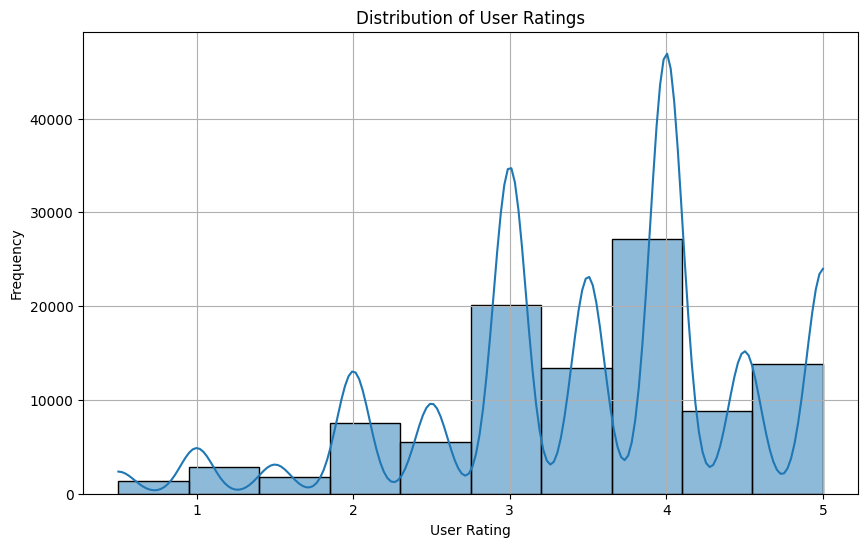

In [33]:
# Step 1: Basic information
# A. Count unique users and movies
unique_users = data_semifinal_df_cleaned['userId'].nunique()
unique_movies = data_semifinal_df_cleaned['movieId'].nunique()

plt.figure(figsize=(10,6))
sns.histplot(data_semifinal_df_cleaned['user_rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

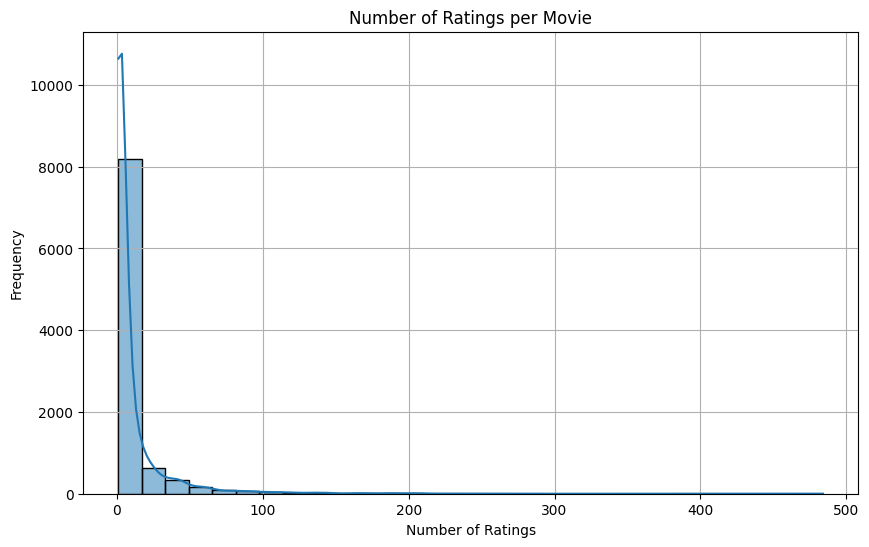

In [34]:
# B. Number of ratings per movie
ratings_per_movie = data_semifinal_df_cleaned.groupby('movieId').size().sort_values(ascending=False)

# Plot the number of ratings per movie
plt.figure(figsize=(10,6))
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

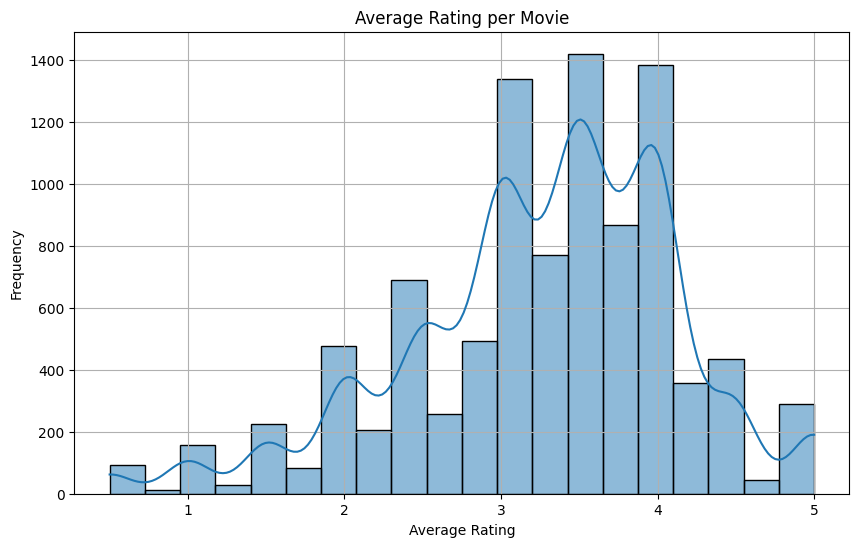

In [35]:
# C. Average rating per movie
avg_rating_per_movie = data_semifinal_df_cleaned.groupby('movieId')['user_rating'].mean()

# Plot average rating per movie
plt.figure(figsize=(10,6))
sns.histplot(avg_rating_per_movie, bins=20, kde=True)
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

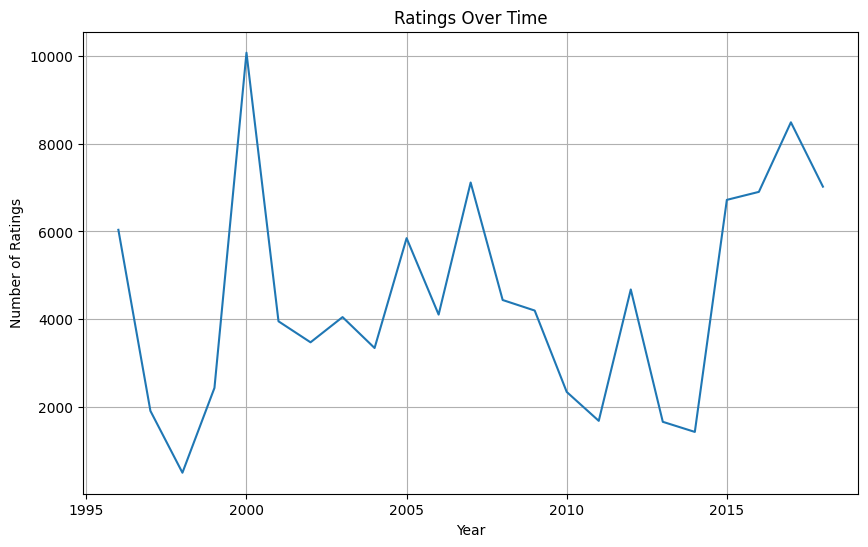

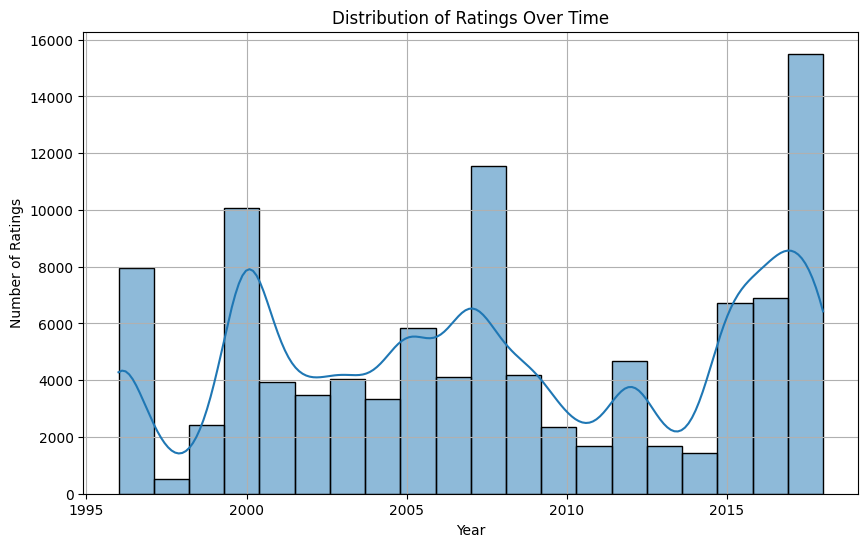

In [39]:
# D. Ratings over time
# Ensure the user_rating_time column is in datetime format
data_semifinal_df_cleaned['user_rating_time'] = pd.to_datetime(data_semifinal_df_cleaned['user_rating_time'])

# Group by year and count the number of ratings per year
ratings_over_time = data_semifinal_df_cleaned.groupby(data_semifinal_df_cleaned['user_rating_time'].dt.year).size()

# Plot ratings over time
plt.figure(figsize=(10,6))
ratings_over_time.plot(kind='line')
plt.title('Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

# Step 2: Exploratory Analysis for Each Column

# A. User Behavior Analysis
# Distribution of user rating times
plt.figure(figsize=(10,6))
sns.histplot(data_semifinal_df_cleaned['user_rating_time'].dt.year, bins=20, kde=True)
plt.title('Distribution of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

In [37]:
data_semifinal_df_cleaned.describe(include='all')

,userId,movieId,user_rating,user_rating_time,title,release_year,user_tag,imdbId,total_user_ratings,average_rating,...,budget,imdb_id,description,popularity,imbd_tagline,cast_actors,director,imdb_rating,imdb_votes,genres
count,102438.000000,102438.000000,102438.000000,102438,102438,102438.000000,102438,1.024380e+05,102438.000000,102438.000000,...,1.024380e+05,102438,102438,102438.000000,102438,102438,102438,102438.000000,1.024380e+05,102438
unique,NaN,NaN,NaN,NaN,9368,NaN,1538,NaN,NaN,NaN,...,NaN,9631,9613,NaN,8209,9550,4140,NaN,NaN,1612
top,NaN,NaN,NaN,NaN,Pulp Fiction,NaN,Unknown,NaN,NaN,NaN,...,NaN,tt0110912,"A burger-loving hit man, his philosophical par...",NaN,Unknown,"Chandler Lindauer, Glendon Rich",Steven Spielberg,NaN,NaN,"Comedy, Drama, Romance"
freq,NaN,NaN,NaN,NaN,484,NaN,98979,NaN,NaN,NaN,...,NaN,484,484,NaN,3524,484,2041,NaN,NaN,4542
mean,327.743103,19637.894053,3.514238,2008-04-26 03:01:44.338624,NaN,1994.495314,NaN,3.551881e+05,61.325992,3.514278,...,4.005572e+07,NaN,NaN,45.459219,NaN,NaN,NaN,7.190572,3.832502e+05,NaN
min,1.000000,1.000000,0.500000,1996-03-29 18:36:55,NaN,1902.000000,NaN,4.170000e+02,1.000000,0.500000,...,0.000000e+00,NaN,NaN,0.033000,NaN,NaN,NaN,1.300000,1.200000e+01,NaN
25%,177.000000,1198.000000,3.000000,2002-04-18 12:19:46,NaN,1990.000000,NaN,9.970000e+04,14.000000,3.200000,...,6.500000e+06,NaN,NaN,20.545000,NaN,NaN,NaN,6.600000,6.709900e+04,NaN
50%,328.000000,2997.000000,3.500000,2007-08-08 15:59:06.500000,NaN,1997.000000,NaN,1.187990e+05,40.000000,3.600000,...,2.380000e+07,NaN,NaN,33.027000,NaN,NaN,NaN,7.300000,2.011380e+05,NaN
75%,477.000000,8360.000000,4.000000,2015-08-18 08:07:06.500000,NaN,2003.000000,NaN,3.172190e+05,85.000000,3.900000,...,5.700000e+07,NaN,NaN,51.547000,NaN,NaN,NaN,7.900000,4.778660e+05,NaN
max,610.000000,193609.000000,5.000000,2018-09-24 14:27:30,NaN,2018.000000,NaN,8.391976e+06,484.000000,5.000000,...,3.790000e+08,NaN,NaN,627.282000,NaN,NaN,NaN,9.300000,2.934407e+06,NaN


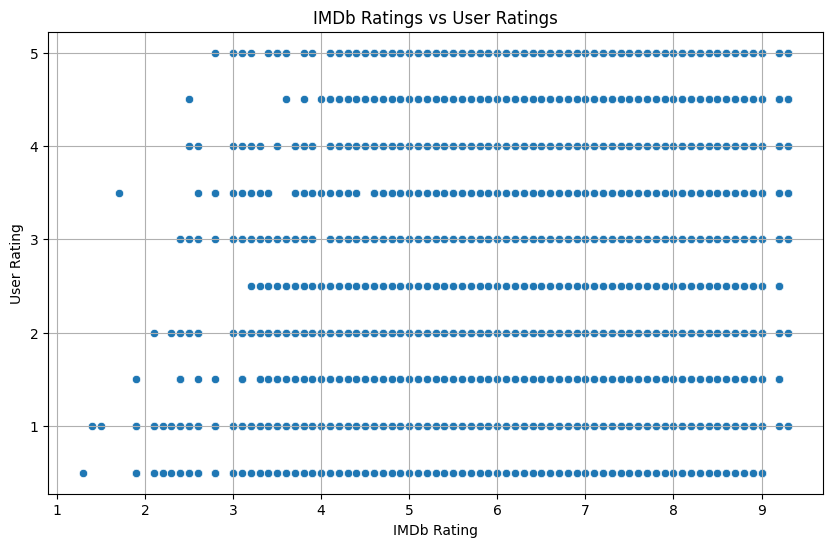

In [41]:
# C. IMDb Ratings vs User Ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_semifinal_df_cleaned['imdb_rating'], y=data_semifinal_df_cleaned['user_rating'])
plt.title('IMDb Ratings vs User Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('User Rating')
plt.grid(True)
plt.show()

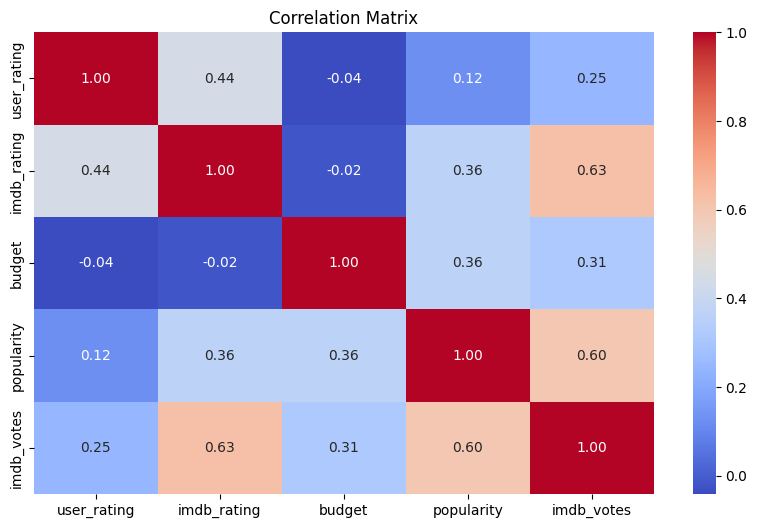

In [42]:
# D. Correlation between numeric columns
correlation_matrix = data_semifinal_df_cleaned[['user_rating', 'imdb_rating', 'budget', 'popularity', 'imdb_votes']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

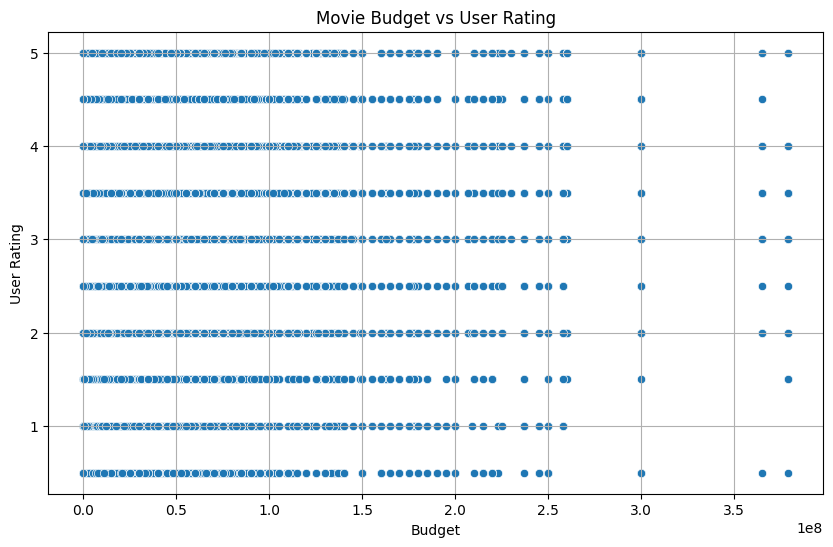

In [43]:
# E. Budget vs User Ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_semifinal_df_cleaned['budget'], y=data_semifinal_df_cleaned['user_rating'])
plt.title('Movie Budget vs User Rating')
plt.xlabel('Budget')
plt.ylabel('User Rating')
plt.grid(True)
plt.show()

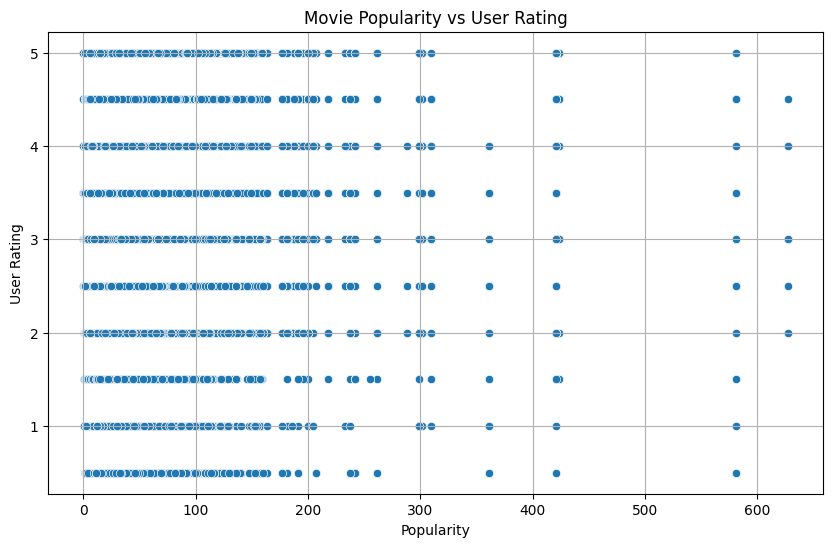

In [44]:
# F. Popularity vs User Ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_semifinal_df_cleaned['popularity'], y=data_semifinal_df_cleaned['user_rating'])
plt.title('Movie Popularity vs User Rating')
plt.xlabel('Popularity')
plt.ylabel('User Rating')
plt.grid(True)
plt.show()

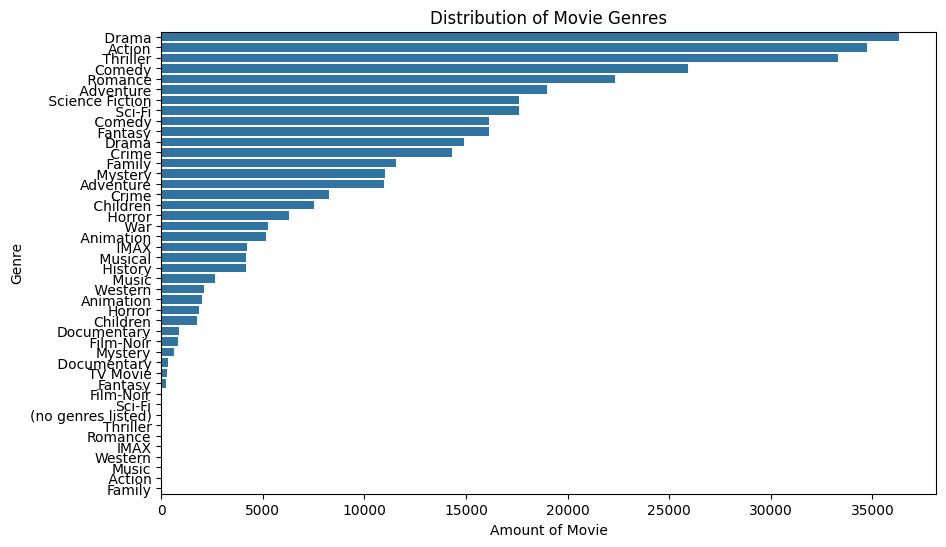

In [54]:
# G. Distribution of Genres
# Split genres into individual genres (assumes genre column is comma-separated)
genres_split = data_semifinal_df_cleaned['genres'].str.split(',', expand=True).stack()
plt.figure(figsize=(10,6))
sns.countplot(y=genres_split, order=genres_split.value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Amount of Movie')
plt.ylabel('Genre')
plt.show()

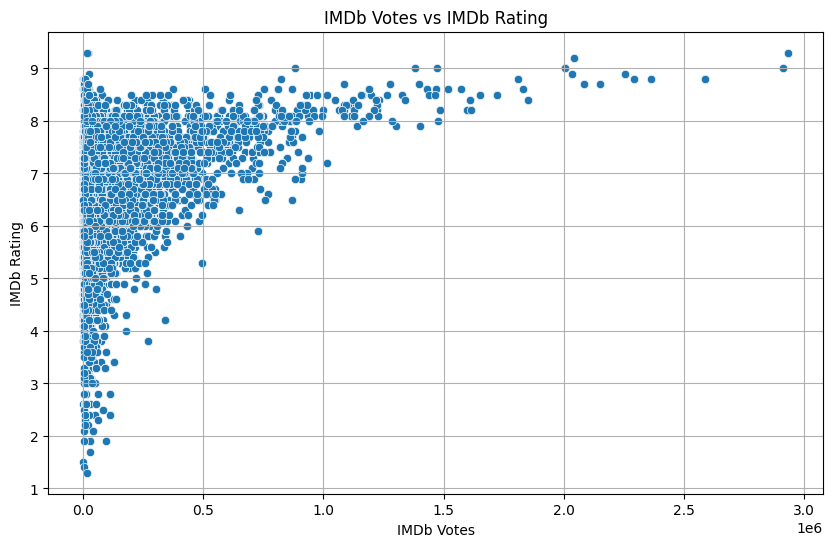

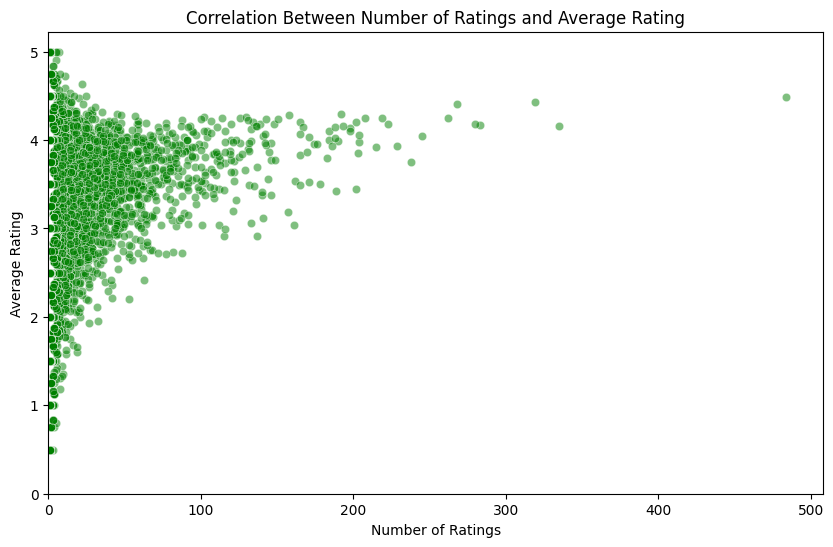

In [59]:
# H. Correlation between IMDb ratings and votes
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_semifinal_df_cleaned['imdb_votes'], y=data_semifinal_df_cleaned['imdb_rating'])
plt.title('IMDb Votes vs IMDb Rating')
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Rating')
plt.grid(True)
plt.show()

# Correlation Between Number of Ratings and Average Rating. Exploring whether movies with more ratings tend to 
# have higher or lower average ratings.

ratings_per_movie = data_semifinal_df_cleaned.groupby('movieId')['user_rating'].count()
average_rating_per_movie = data_semifinal_df_cleaned.groupby('movieId')['user_rating'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ratings_per_movie, y=average_rating_per_movie, alpha=0.5, color='green')
plt.title('Correlation Between Number of Ratings and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

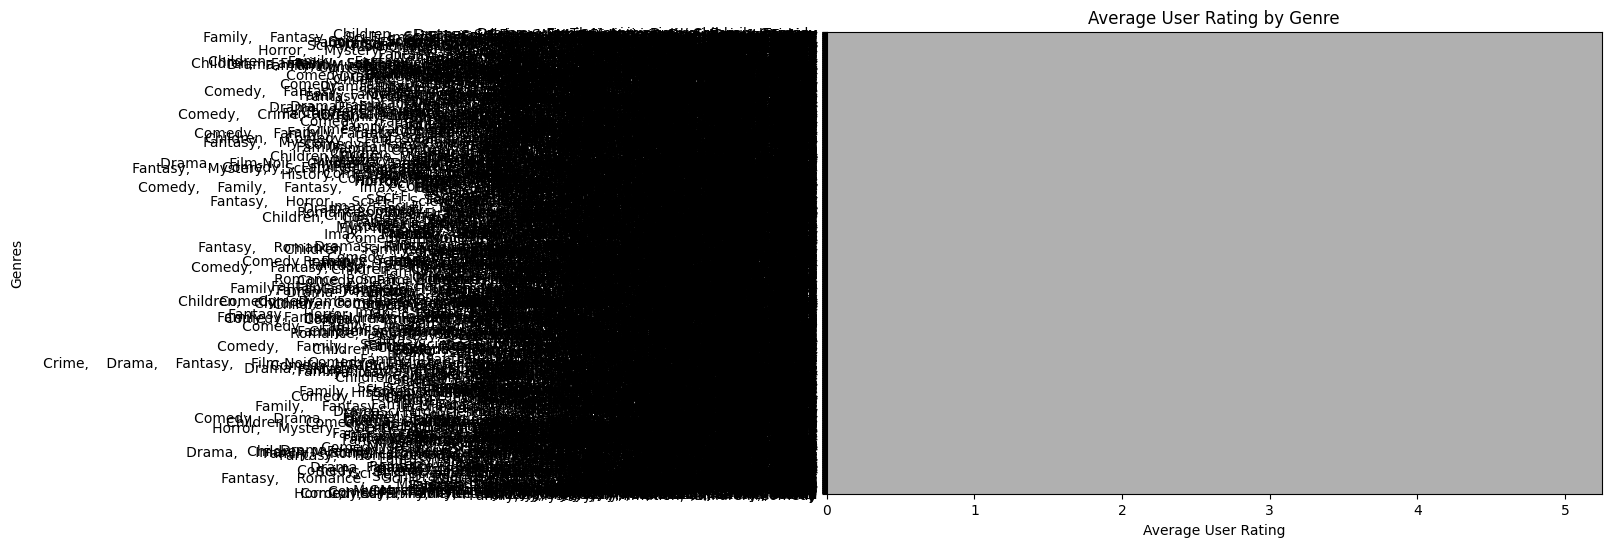

In [147]:
# Step 4: Visualizing Rating Disparities across Genres
# Group by genres and calculate average user rating
genres_avg_rating = data_semifinal_df_cleaned.groupby('genres')['user_rating'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=genres_avg_rating.values, y=genres_avg_rating.index)
plt.title('Average User Rating by Genre')
plt.xlabel('Average User Rating')
plt.ylabel('Genres')
plt.grid(True)
plt.show()

In [ ]:
take in the ratings of the column "imdb_rating" and "tmdb_vote_average" and compare it to "user_rating" by "userId"